# Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that transforms the dataset into a new coordinate system, where the **axes (principal components)** are chosen to maximise variance.

PCA helps us:
- Reduce the number of features (dimensionality)
- Decorrelate the features (remove redundancy)
- Visualise high-dimensional data in 2D or 3D
- Improve the performance of models like clustering

---

### 📐 Key Idea

Given a dataset with $n$ observations and $d$ features, PCA finds new axes:
- $PC_1$: direction of **maximum variance**
- $PC_2$: orthogonal to $PC_1$, with the **next highest variance**
- and so on...

Each **principal component** is a linear combination of the original features.

---

### 🧮 Mathematical Definition

Let:
- $\mathbf{X} \in \mathbb{R}^{n \times d}$ be the mean-centred data matrix
- $\Sigma = \frac{1}{n} \mathbf{X}^\top \mathbf{X}$ be the empirical covariance matrix

We solve the **eigenvalue decomposition** problem:
$$
\Sigma \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

Where:
- $\mathbf{v}_i$ is the $i$-th **principal component direction**
- $\lambda_i$ is the **variance explained** by that direction

The components are ranked by $\lambda_i$ (largest to smallest).

---

### 📊 Explained Variance

The **explained variance ratio** of each component is:
$$
\text{ExplainedVariance}(PC_i) = \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}
$$

We often choose the first $k$ components such that:
$$
\sum_{i=1}^{k} \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j} \geq 0.95
$$
This means we retain **at least 95% of the original information**.

---

### 🔎 Summary

- PCA is unsupervised and does not use class labels
- It works best when the features are **standardised**
- It can **reveal structure** in high-dimensional data and **improve clustering or classification**

We’ll now apply PCA to real data and visualise its effects.


In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load and scale
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_two = X[:, :2]
feature_x = data.feature_names[0]
feature_y = data.feature_names[1]


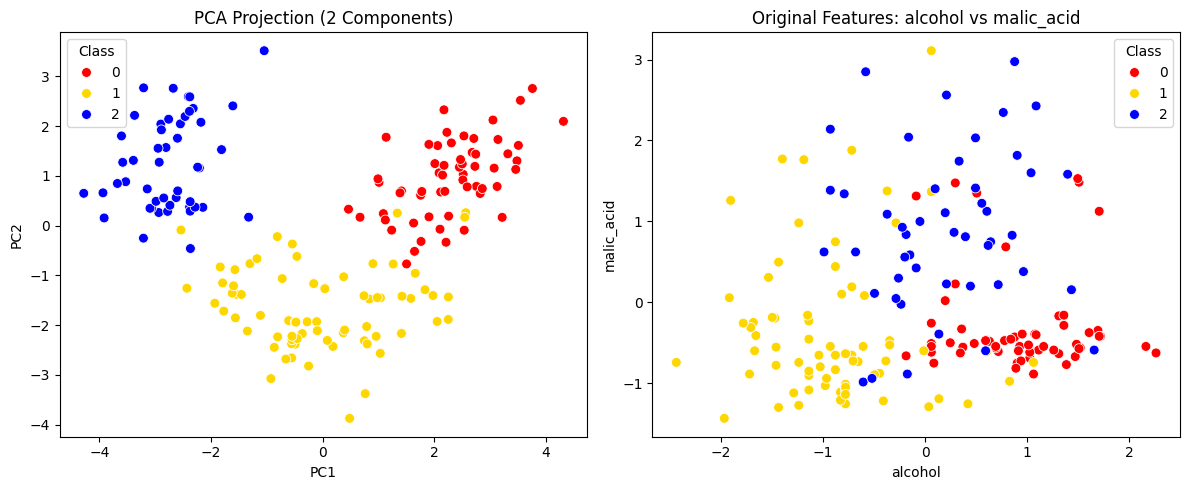

In [2]:
# Define a custom color palette: red, yellow, blue
custom_palette = {0: "red", 1: "gold", 2: "blue"}  # Class 1 = yellow

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PCA plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=custom_palette, s=50, ax=axes[0])
axes[0].set_title("PCA Projection (2 Components)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Class")

# Original features plot
sns.scatterplot(x=X_two[:, 0], y=X_two[:, 1], hue=y, palette=custom_palette, s=50, ax=axes[1])
axes[1].set_title(f"Original Features: {feature_x} vs {feature_y}")
axes[1].set_xlabel(feature_x)
axes[1].set_ylabel(feature_y)
axes[1].legend(title="Class")

plt.tight_layout()
plt.show()


### 💡 Interpreting PC1

The first principal component (PC1) is a weighted combination of all original features. The weights (also called "loadings") tell us how much each feature contributes to the component.

We can interpret PC1 by examining which features have the highest contribution.

Note: The direction (positive or negative) is important when interpreting actual component values, but for contribution magnitude, we consider the absolute values.


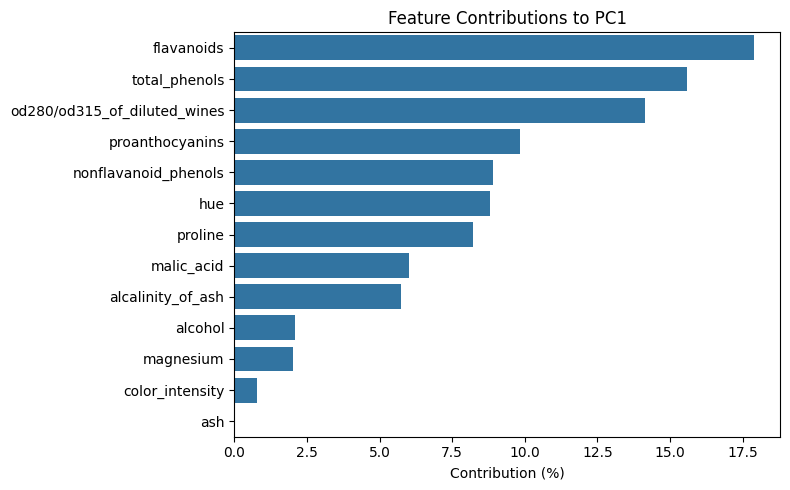

In [3]:
# Get original feature names
features = data.feature_names

# Extract PC1 loadings
pc1_loadings = pca.components_[0]

# Create DataFrame of feature contributions to PC1
pc1_df = pd.DataFrame({
    "Feature": features,
    "PC1 Weight": pc1_loadings,
    "Contribution (%)": 100 * pc1_loadings**2 / np.sum(pc1_loadings**2)
}).sort_values("Contribution (%)", ascending=False)

# Display top contributors
pc1_df

plt.figure(figsize=(8, 5))
sns.barplot(data=pc1_df, y="Feature", x="Contribution (%)")
plt.title("Feature Contributions to PC1")
plt.xlabel("Contribution (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()



### 📈 Explained Variance vs Number of Components

This plot shows the **cumulative explained variance** as we add more principal components.

- Each principal component captures a portion of the total variance in the data.
- The curve tells us **how many components are needed to retain most of the information**.
- For example, if the curve crosses 0.95 at 7 components, then keeping the first 7 components preserves 95% of the data’s structure.

We often use this plot to **choose the optimal number of components** for dimensionality reduction — balancing accuracy and simplicity.


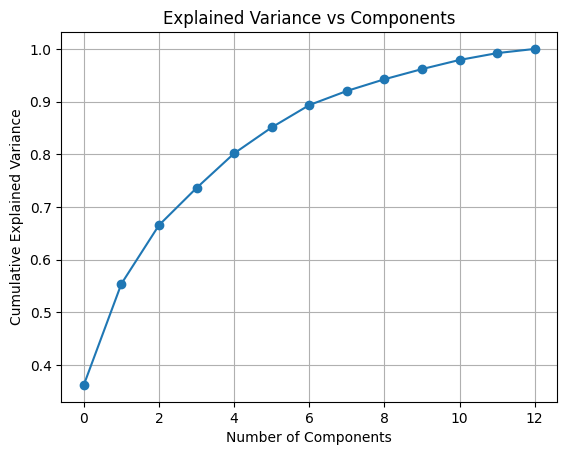

In [4]:
import numpy as np

pca_all = PCA().fit(X)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.grid(True)
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering on original data
labels_orig = KMeans(n_clusters=3, random_state=42).fit_predict(X)
score_orig = silhouette_score(X, labels_orig)

# Clustering on PCA-transformed data
X_pca3 = PCA(n_components=3).fit_transform(X)
labels_pca = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca3)
score_pca = silhouette_score(X_pca3, labels_pca)

print(f"Silhouette Score (Original): {score_orig:.3f}")
print(f"Silhouette Score (PCA): {score_pca:.3f}")


Silhouette Score (Original): 0.285
Silhouette Score (PCA): 0.454


### PCA with `n_components=0.95`

Instead of manually choosing how many principal components to keep, we can set `n_components=0.95`. This tells PCA to select the **minimum number of components** that preserve **at least 95% of the total variance** in the data.

We’ll transform the data using this setting, then apply K-Means clustering and visualise the results using the first two PCs.


In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)

print(f"Number of components selected to retain 95% variance: {X_pca_95.shape[1]}")

# Apply KMeans on reduced data
kmeans_95 = KMeans(n_clusters=3, random_state=42)
labels_pca_95 = kmeans_95.fit_predict(X_pca_95)

# Silhouette Score
score_pca_95 = silhouette_score(X_pca_95, labels_pca_95)
print(f"Silhouette Score (PCA 95%): {score_pca_95:.3f}")



Number of components selected to retain 95% variance: 10
Silhouette Score (PCA 95%): 0.299


Silhouette Score (Raw Features): 0.4841
Silhouette Score (PCA): 0.5611


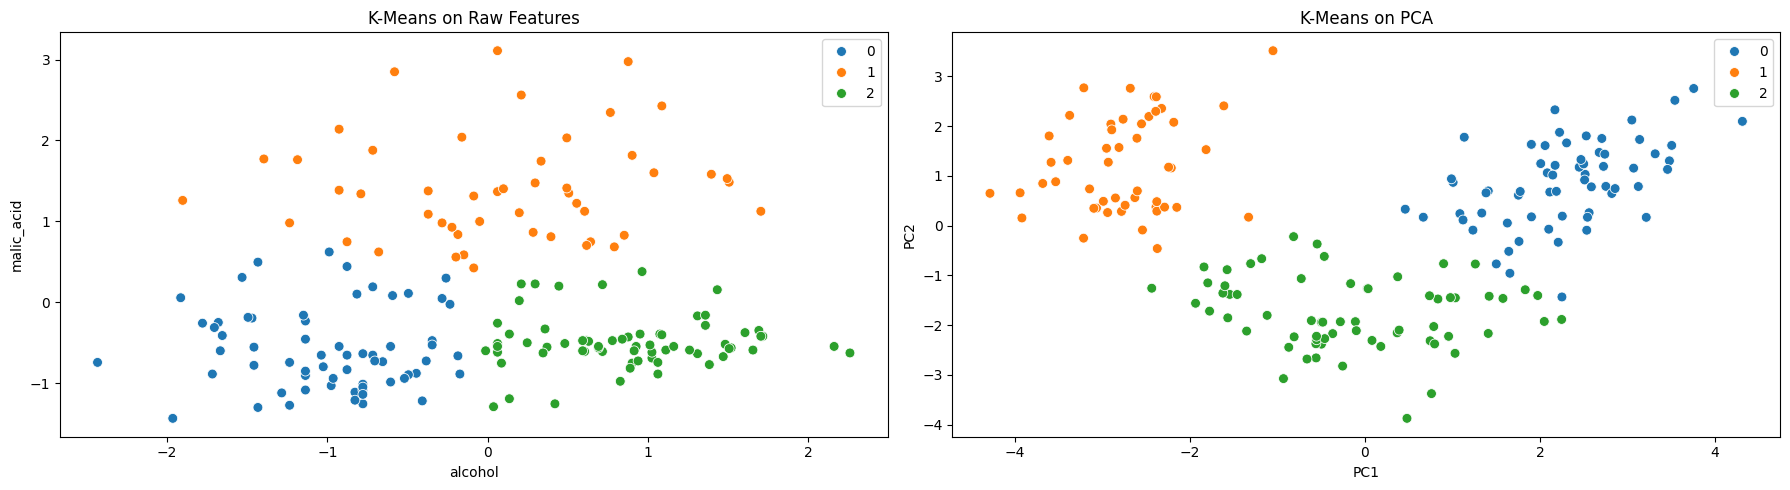

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering
def cluster_and_score(X_proj, name):
    kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_proj)
    score = silhouette_score(X_proj, labels)
    print(f"Silhouette Score ({name}): {score:.4f}")
    return labels

# Fit
X_raw = X[:, :2]
X_pca = PCA(n_components=2).fit_transform(X)

labels_raw = cluster_and_score(X_raw, "Raw Features")
labels_pca = cluster_and_score(X_pca, "PCA")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Raw
sns.scatterplot(x=X_raw[:, 0], y=X_raw[:, 1], hue=labels_raw, palette="tab10", s=50, ax=axes[0])
axes[0].set_title("K-Means on Raw Features")
axes[0].set_xlabel(data.feature_names[0])
axes[0].set_ylabel(data.feature_names[1])

# PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette="tab10", s=50, ax=axes[1])
axes[1].set_title("K-Means on PCA")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")


plt.tight_layout()
plt.show()
